# Plotting

This file is to craetes plots based on the data from OCTAM Data Analysis

In [3]:
# import libraries
import os
import glob
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import plotly.express as px
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point
import folium
import contextily as ctx
plt.style.use('ggplot')

## Create subplots of shapefile map and traffic flow line plot by postmile


In [5]:
# create a list of years for dictionary keys
data_path = 'data/'
year_totvol_shp = glob.glob(os.path.join(data_path, "SR74_*_pm.shp"))
year_list = [x[10:16] for x in year_totvol_shp]
year_list

['NB2045', 'BO2045', 'BY2019']

In [6]:
# loop through the year list and read shpaefiles as gdf
SR74_TOTVOL_pm = {}

for i in year_list:
    path = 'data/'+'SR74_'+i+'_pm.shp'
    gdf_result = gpd.read_file(path)
    SR74_TOTVOL_pm[i] = gdf_result
SR74_TOTVOL_pm['BO2045']

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,TOT_VOL,Lat_WGS84,Long_WGS84,geometry
0,263415,74,74_20171231_R,ORA,12,NaN,0.000000,NaN,0,56543.399,33.502510,-117.658487,POINT (-117.65849 33.50251)
1,259961,74,74_20171231_R,ORA,12,NaN,0.100000,NaN,0.1,58140.420,33.502961,-117.656925,POINT (-117.65692 33.50296)
2,262293,74,74_20171231_R,ORA,12,NaN,0.200000,NaN,0.2,58140.420,33.503350,-117.655417,POINT (-117.65542 33.50335)
3,258833,74,74_20171231_R,ORA,12,NaN,0.300000,NaN,0.3,48648.345,33.503892,-117.653872,POINT (-117.65387 33.50389)
4,261164,74,74_20171231_R,ORA,12,NaN,0.400000,NaN,0.4,48648.345,33.504810,-117.652473,POINT (-117.65247 33.50481)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,259304,74,74_20171231_R,ORA,12,NaN,16.100000,NaN,16.1,17986.599,33.596965,-117.462853,POINT (-117.46285 33.59697)
166,263967,74,74_20171231_R,ORA,12,NaN,16.299999,NaN,16.3,17986.599,33.598769,-117.460747,POINT (-117.46075 33.59877)
167,260508,74,74_20171231_R,ORA,12,NaN,16.400000,NaN,16.4,17986.599,33.600200,-117.460009,POINT (-117.46001 33.60020)
168,262841,74,74_20171231_R,ORA,12,NaN,16.500000,NaN,16.5,17986.599,33.601574,-117.459248,POINT (-117.45925 33.60157)


In [18]:
def plot_TOTVOL_pm(dict_gdf: dict):
    list_plots = []
    for gdf_key, gdf_value in dict_gdf.items():
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), layout="constrained")
        color_column = 'TOT_VOL'
        cmap = 'RdYlBu_r'
        dict_gdf[gdf_key].plot(column=color_column, cmap=cmap, linewidth=5, ax=ax1)
        ctx.add_basemap(ax=ax1, zoom=13, crs='EPSG:4019', source=ctx.providers.Esri.WorldStreetMap)

        # set up xlabel, ylabel, and title for ax1
        ax1.set_xlabel('long')
        ax1.set_ylabel('lat')
        ax1.set_title(f'Map of SR74 - {gdf_key}')
        # set up legend
        # vmin, vmax = SR74_BY2019_gdf[color_column].min(), SR74_BY2019_gdf[color_column].max()
        # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # cbar = fig.colorbar(sm)

        ax2.plot(dict_gdf[gdf_key]['PM'], dict_gdf[gdf_key]['TOT_VOL'])

        ax2.set_xlabel('Postmile')
        ax2.set_ylabel('Total flow')
        ax2.set_title(f'SR74 Total Flow {gdf_key}')
        list_plots.append(fig)
    return list_plots

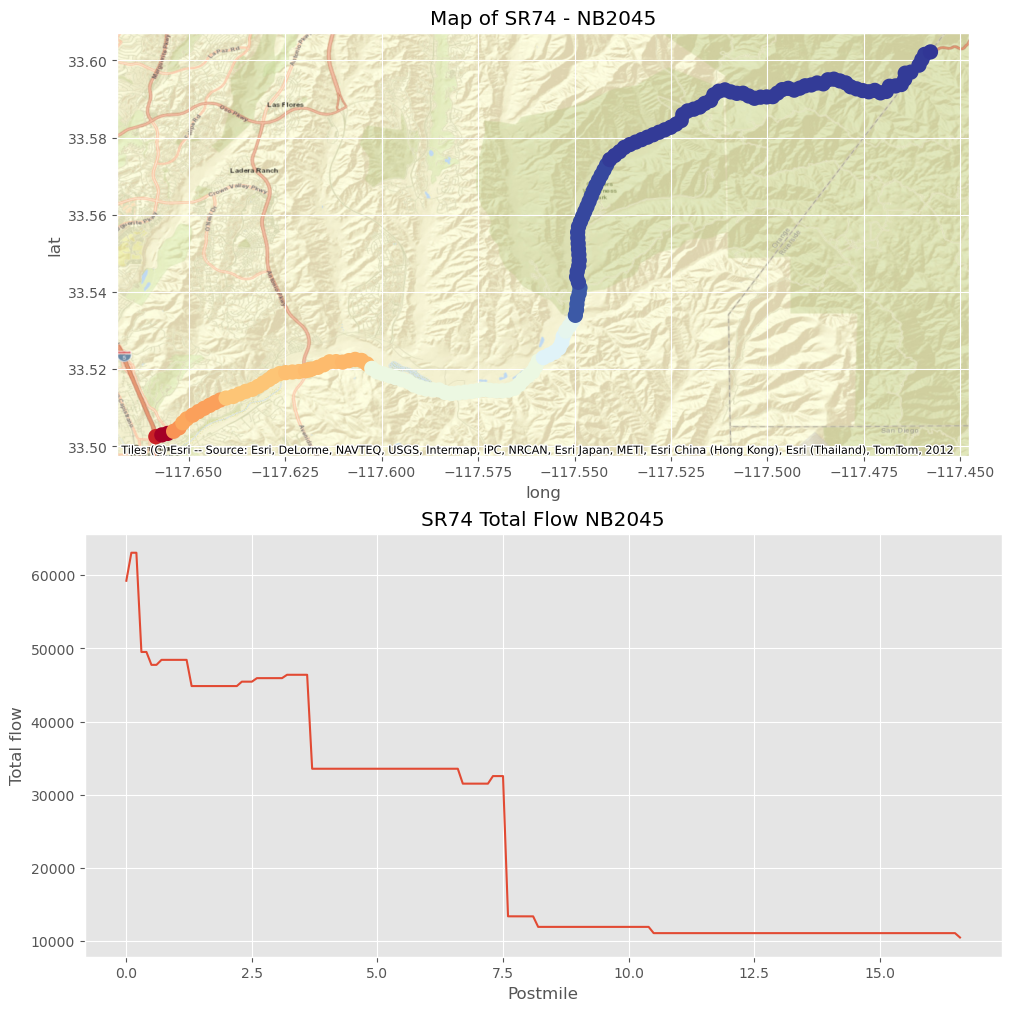

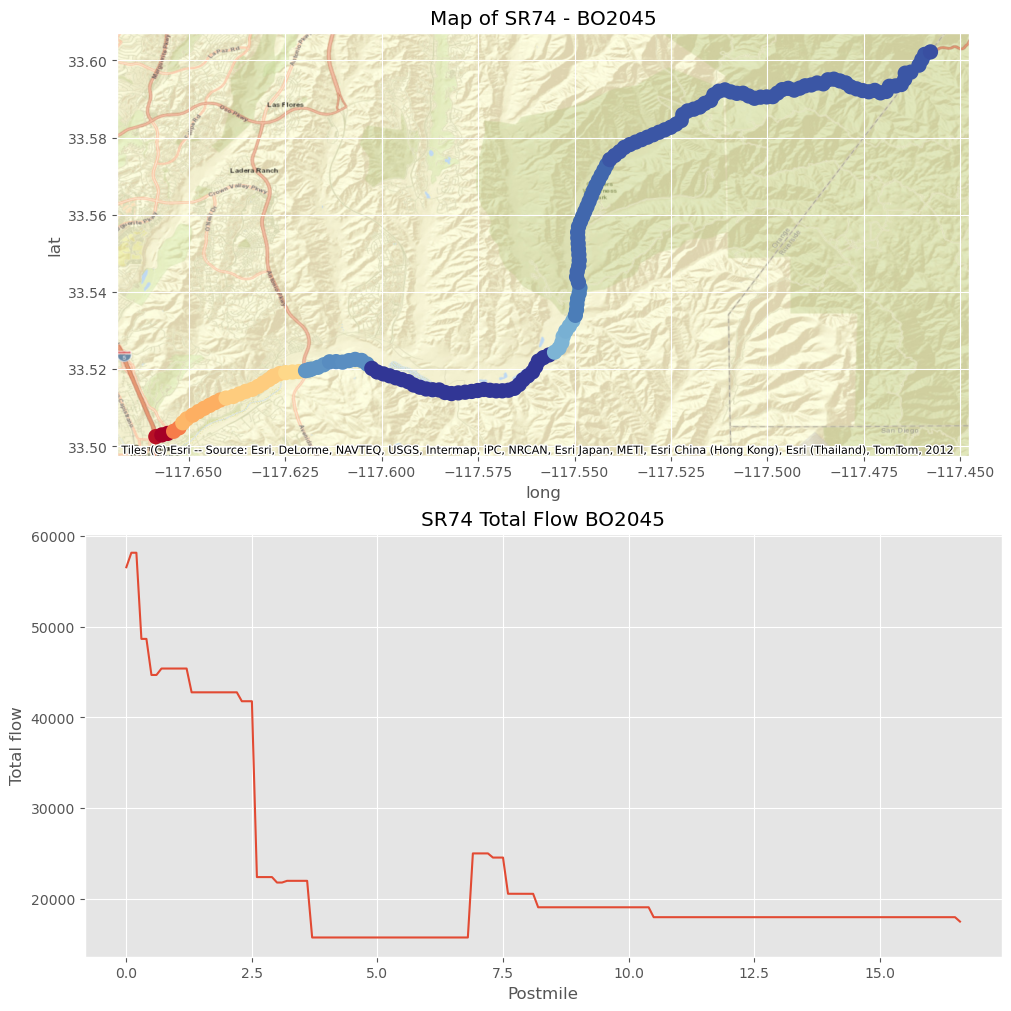

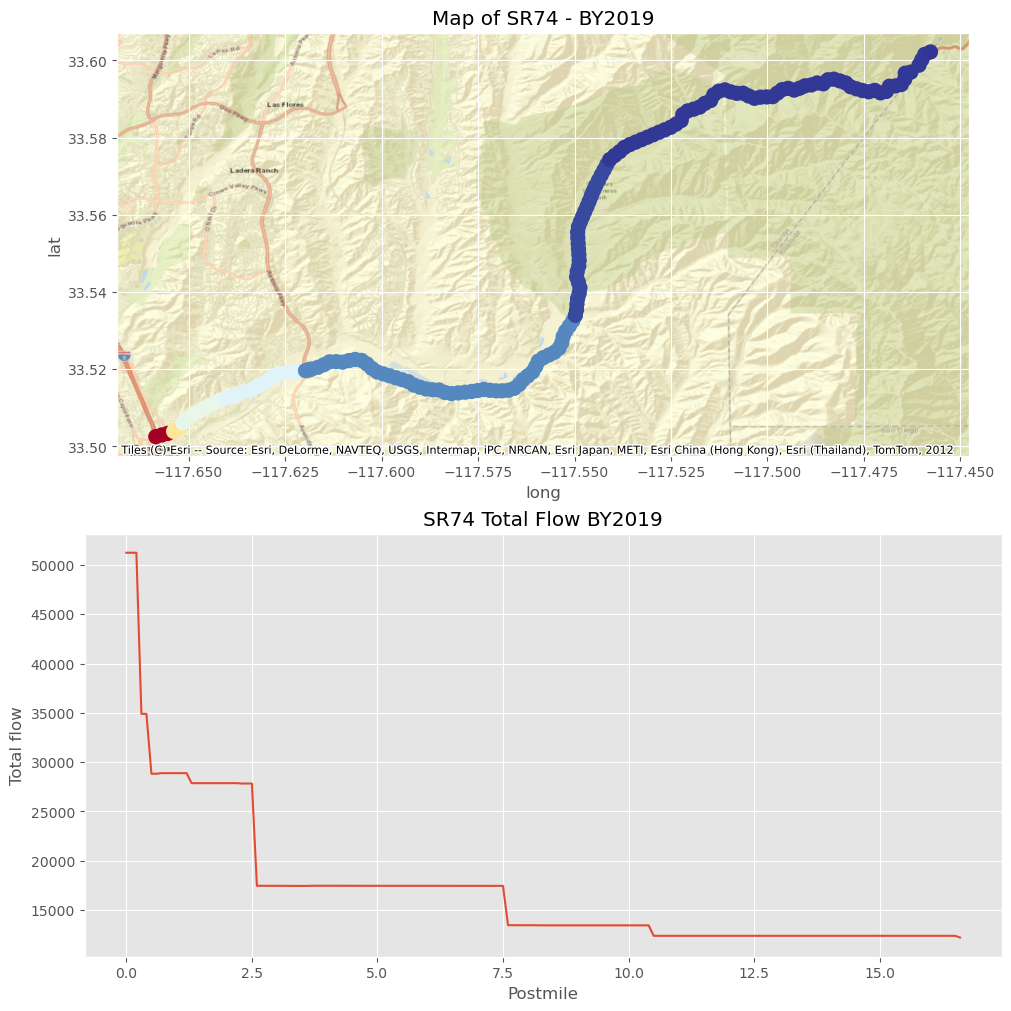

In [19]:
TOTVOL_pm_plots = plot_TOTVOL_pm(SR74_TOTVOL_pm)

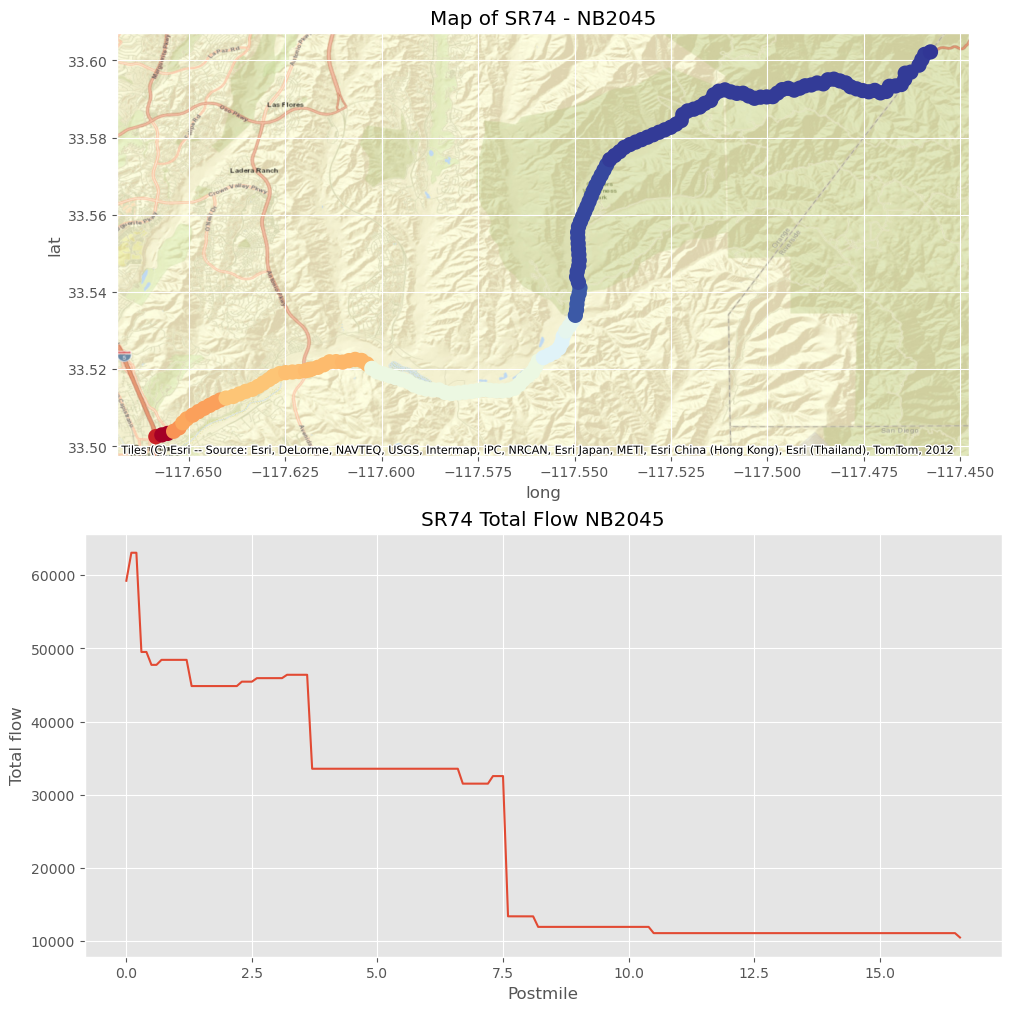

In [21]:
TOTVOL_pm_plots[0]